In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Book2.csv')
df.head()

,BuildingID,ConstructionType,OccupancyType,MaximumOccupancy,YearBuilt,SystemID,SystemType,Description,ProcedureID,ProcedureName,EmergencyDescription
0,1,Steel Frame,Office,200,2000,1,Sprinkler System,Automatic water-based fire suppression,1,Evacuation Plan,Guidelines for safely evacuating the building
1,2,Reinforced Concrete,Warehouse,500,2010,2,Fire Alarm System,Detection and alert system for fire incidents,1,Evacuation Plan,Guidelines for safely evacuating the building
2,3,Wood Frame,Residential,50,1995,3,Gas Suppression System,Gaseous agents to suppress fires,3,Assembly Point Protocol,Instructions for gathering at assembly points
3,4,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,4,Medical Evacuation Plan,Procedures for evacuating patients during emer...
4,5,Steel Frame,Hotel,300,2008,1,Sprinkler System,Automatic water-based fire suppression,5,Security Escort Protocol,Procedures for safely escorting guests during ...


In [4]:
#cleanse data
missing_values=df.isnull().sum()
missing_values

BuildingID              0
ConstructionType        0
OccupancyType           0
MaximumOccupancy        0
YearBuilt               0
SystemID                0
SystemType              0
Description             0
ProcedureID             0
ProcedureName           0
EmergencyDescription    0
dtype: int64

### 1. Building Information:

✅1.1 What are the details of Building with ID 5, including construction type, occupancy type, and maximum occupancy?

In [6]:
building_5=df.loc[df['BuildingID']==5]
building_5

,BuildingID,ConstructionType,OccupancyType,MaximumOccupancy,YearBuilt,SystemID,SystemType,Description,ProcedureID,ProcedureName,EmergencyDescription
4,5,Steel Frame,Hotel,300,2008,1,Sprinkler System,Automatic water-based fire suppression,5,Security Escort Protocol,Procedures for safely escorting guests during ...


✅1.2 Can you generate a summary of the maximum occupancy for each construction type?

In [9]:
maximum_occupancy_construction_type=df.groupby('OccupancyType').sum()['MaximumOccupancy']
maximum_occupancy_construction_type

<ipython-input-9-bd7bbcc1e4f9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maximum_occupancy_construction_type=df.groupby('OccupancyType').sum()['MaximumOccupancy']


OccupancyType
Apartments        300
Healthcare        750
Hotel            1500
Office           1600
Residential       250
Restaurant        400
School           1000
Shopping Mall    1600
Warehouse        4500
Name: MaximumOccupancy, dtype: int64

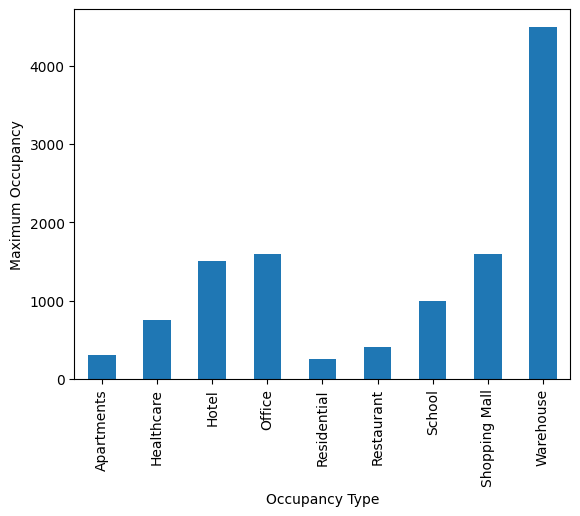

In [11]:
#make chart
maximum_occupancy_construction_type = pd.DataFrame({
    'OccupancyType': ['Apartments','Healthcare','Hotel','Office','Residential', 'Restaurant','School','Shopping Mall','Warehouse'],
    'MaximumOccupancy': [300,750,1500,1600,250,400,1000,1600,4500]
})

ax = maximum_occupancy_construction_type.plot(kind='bar', x='OccupancyType', y='MaximumOccupancy', legend=False)
plt.ylabel('Maximum Occupancy')
plt.xlabel('Occupancy Type')
plt.show()

### 2. Fire Protection Systems:

✅2.1 How many buildings have a Water Mist System, and what are their details?





In [17]:
water_mist_buildings = df[df['SystemType'] == 'Water Mist System']
water_mist_buildings

,BuildingID,ConstructionType,OccupancyType,MaximumOccupancy,YearBuilt,SystemID,SystemType,Description,ProcedureID,ProcedureName,EmergencyDescription
3,4,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,4,Medical Evacuation Plan,Procedures for evacuating patients during emer...
8,9,Wood Frame,Apartments,75,2005,4,Water Mist System,High-pressure water mist for fire control,9,Apartment Evacuation Plan,Guidelines for evacuating apartment buildings
14,15,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,15,Medical Staff Emergency Response Drills,Drills for healthcare staff to respond effecti...
19,20,Wood Frame,Apartments,75,2005,4,Water Mist System,High-pressure water mist for fire control,20,Apartment Resident Emergency Preparedness Semi...,Seminars to educate apartment residents on eme...
25,26,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,26,Healthcare Facility Fire Safety Compliance Audits,Regular audits to ensure compliance with fire ...
30,31,Wood Frame,Apartments,75,2005,4,Water Mist System,High-pressure water mist for fire control,31,Apartment Building Fire Safety Forums,Organizing forums to address fire safety conce...
36,37,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,37,Fire Safety Drills for Healthcare Staff,Training healthcare staff on emergency respons...
41,42,Wood Frame,Apartments,75,2005,4,Water Mist System,High-pressure water mist for fire control,42,Apartment Building Fire Safety Seminars for Re...,Organizing seminars to educate apartment resid...
47,48,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,48,Healthcare Facility Fire Safety Drills for Pat...,Conducting drills to prepare patients for emer...


✅2.2 Provide a breakdown of the count of buildings for each type of fire protection system.

In [18]:
count=df['SystemType'].value_counts()


Sprinkler System          14
Fire Alarm System          9
Gas Suppression System     9
Water Mist System          9
Smoke Control System       5
Combination System         4
Name: SystemType, dtype: int64

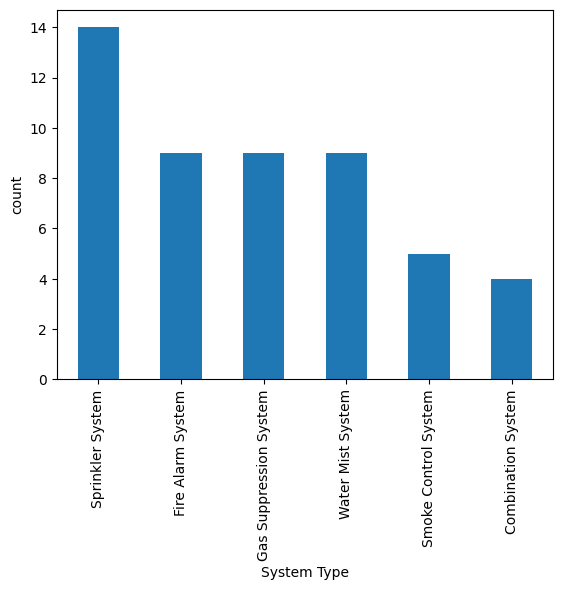

In [19]:
#make chart
count_fire_protection_system = pd.DataFrame({
    'SystemType': ['Sprinkler System','Fire Alarm System','Gas Suppression System','Water Mist System','Smoke Control System', 'Combination System'],
    'count': [14,9,9,9,5,4]
})

ax = count_fire_protection_system.plot(kind='bar', x='SystemType', y='count', legend=False)
plt.ylabel('count')
plt.xlabel('System Type')
plt.show()

✅2.3 Distribution of fire protection systems for each occupancy type:

In [26]:
system_count=df.groupby(['OccupancyType','SystemType']).sum()
system_count

<ipython-input-26-86f1bb61301d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  system_count=df.groupby(['OccupancyType','SystemType']).sum()


BuildingID  MaximumOccupancy  YearBuilt  \
OccupancyType SystemType                                                        
Apartments    Water Mist System              102               300       8020   
Healthcare    Water Mist System              130               750      10075   
Hotel         Sprinkler System               135              1500      10040   
Office        Gas Suppression System         106               600       8044   
              Sprinkler System               111              1000      10000   
Residential   Gas Suppression System         125               250       9975   
Restaurant    Fire Alarm System               98               400       8072   
School        Smoke Control System           140              1000       9950   
Shopping Mall Combination System              94              1600       8048   
Warehouse     Fire Alarm System              120              2500      10050   
              Sprinkler System               114              2000       8040   

                                      SystemID  ProcedureID  
OccupancyType SystemType                                     
Apartments    Water Mist System             16          102  
Healthcare    Water Mist System             20          130  
Hotel         Sprinkler System               5          135  
Office        Gas Suppression System        12          106  
              Sprinkler System               5          111  
Residential   Gas Suppression System        15          125  
Restaurant    Fire Alarm System              8           98  
School        Smoke Control System          25          140  
Shopping Mall Combination System            24           94  
Warehouse     Fire Alarm System             10          119  
              Sprinkler System               4          114

### 3. Emergency Response Procedures:

✅3.1  Which emergency response procedures are associated with Building 8?





In [36]:
building_8=df.loc[df['BuildingID']==8]
building_8['EmergencyDescription']


7    Procedures for handling kitchen-related emerge...
Name: EmergencyDescription, dtype: object

✅3.2 Can you list the unique emergency response procedures in the dataset and their occurrence counts?

In [43]:
procedure_counts = df['ProcedureName'].value_counts()
procedure_counts

Evacuation Plan                                              2
Hotel Emergency Response Team (HERT) Training                1
Public Awareness Campaigns for Mall Visitors                 1
Restaurant Fire Safety Checklist for Employees               1
Apartment Building Fire Safety Forums                        1
Corporate Fire Safety Policies and Training                  1
Fire Safety Drills for High-Rise Buildings                   1
Warehouse Inventory Safety Procedures                        1
Security Camera Surveillance for Fire Detection              1
Community Fire Safety Workshops                              1
Fire Safety Drills for Healthcare Staff                      1
Hotel Fire Safety Consultations with Experts                 1
School Fire Safety Clubs for Students                        1
Fire Safety Drills for Mall Security Personnel               1
Restaurant Fire Safety Inspections                           1
Apartment Building Fire Safety Seminars for Residents  

### 4. Associations:

✅ 4.1  How many buildings have both a Sprinkler System and a Fire Drill Protocol?

In [51]:
buildings_both_systems=df[(df['SystemType']=='Sprinkler System') & (df['ProcedureName']=='Fire Drill Protocol')]
buildings_both_systems

,BuildingID,ConstructionType,OccupancyType,MaximumOccupancy,YearBuilt,SystemID,SystemType,Description,ProcedureID,ProcedureName,EmergencyDescription


✅ 4.2 Emergency response procedures associated with each combination of fire protection systems:

In [52]:
df.head()

,BuildingID,ConstructionType,OccupancyType,MaximumOccupancy,YearBuilt,SystemID,SystemType,Description,ProcedureID,ProcedureName,EmergencyDescription
0,1,Steel Frame,Office,200,2000,1,Sprinkler System,Automatic water-based fire suppression,1,Evacuation Plan,Guidelines for safely evacuating the building
1,2,Reinforced Concrete,Warehouse,500,2010,2,Fire Alarm System,Detection and alert system for fire incidents,1,Evacuation Plan,Guidelines for safely evacuating the building
2,3,Wood Frame,Residential,50,1995,3,Gas Suppression System,Gaseous agents to suppress fires,3,Assembly Point Protocol,Instructions for gathering at assembly points
3,4,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,4,Medical Evacuation Plan,Procedures for evacuating patients during emer...
4,5,Steel Frame,Hotel,300,2008,1,Sprinkler System,Automatic water-based fire suppression,5,Security Escort Protocol,Procedures for safely escorting guests during ...


In [56]:
system_procedure_association = df.groupby(['SystemType', 'ProcedureName']).size().unstack(fill_value=0)
system_procedure_association

ProcedureName,Advanced Fire Safety Technology Integration,Apartment Building Fire Safety Forums,Apartment Building Fire Safety Seminars for Residents,Apartment Evacuation Plan,Apartment Resident Emergency Preparedness Seminars,Assembly Point Protocol,Community Emergency Response Team (CERT) Training,Community Fire Safety Workshops,Corporate Fire Safety Policies and Training,Employee First Aid and Fire Safety Kits,...,Restaurant Fire Safety Checklist for Employees,Restaurant Fire Safety Inspections,School Fire Safety Art and Essay Competitions,School Fire Safety Clubs for Students,Security Camera Surveillance for Fire Detection,Security Escort Protocol,Security Personnel Emergency Response Training,Shelter-in-Place Plan,Student Fire Safety Education Program,Warehouse Inventory Safety Procedures
SystemType,,,,,,,,,,,,,,,,,,,,,
Combination System,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Fire Alarm System,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
Gas Suppression System,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Smoke Control System,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
Sprinkler System,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
Water Mist System,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Analysis:

✅ 5.1 Number of buildings constructed before the year 2000:

In [57]:
df.head()

,BuildingID,ConstructionType,OccupancyType,MaximumOccupancy,YearBuilt,SystemID,SystemType,Description,ProcedureID,ProcedureName,EmergencyDescription
0,1,Steel Frame,Office,200,2000,1,Sprinkler System,Automatic water-based fire suppression,1,Evacuation Plan,Guidelines for safely evacuating the building
1,2,Reinforced Concrete,Warehouse,500,2010,2,Fire Alarm System,Detection and alert system for fire incidents,1,Evacuation Plan,Guidelines for safely evacuating the building
2,3,Wood Frame,Residential,50,1995,3,Gas Suppression System,Gaseous agents to suppress fires,3,Assembly Point Protocol,Instructions for gathering at assembly points
3,4,Concrete Block,Healthcare,150,2015,4,Water Mist System,High-pressure water mist for fire control,4,Medical Evacuation Plan,Procedures for evacuating patients during emer...
4,5,Steel Frame,Hotel,300,2008,1,Sprinkler System,Automatic water-based fire suppression,5,Security Escort Protocol,Procedures for safely escorting guests during ...


In [61]:
count_before_2000=df[df['YearBuilt']<2000]
len(count_before_2000)

10

✅ 5.2 Most common construction type in the dataset:

In [66]:
most_common_construction=df['ConstructionType'].mode().values[0]
most_common_construction

'Steel Frame'

✅ 5.3 Trend of building construction over the years:

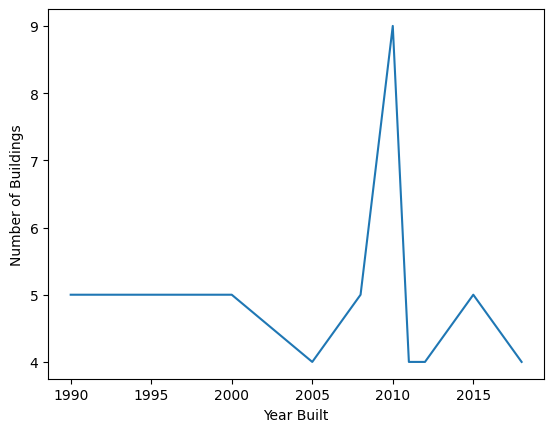

In [71]:
trend_over_years = df.groupby('YearBuilt').size()
trend_over_years.plot(kind='line')
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')
plt.show()
